In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('raw.csv' , delimiter= ',')
df['spread'] = df['SMF(TL/MWh)'] - df['PTF(TL/MWh)']
df['target_load'] = df['YAL0(TL/MWh)'] + df['YAL1(TL/MWh)'] - df['YAL TeslimEdilemeyenMiktar(MWh)'] - df['YAT0(TL/MWh)'] - df['YAT1(TL/MWh)'] + df['YAT TeslimEdilemeyenMiktar(MWh)']
df = df.fillna(0)
print(len(df))
df['Date'] = pd.date_range(start = '20180201' , freq = 'H' , periods = len(df))
df = df[['Date' , 'target_load']]
print(df.dtypes)
print(df.describe())

df.set_index('Date' , inplace = True)
df = df.asfreq('h')
df.head()




26328
Date           datetime64[ns]
target_load           float64
dtype: object
        target_load
count  26328.000000
mean     216.276895
std      877.945785
min    -5229.322000
25%     -328.075000
50%      200.983000
75%      749.662750
max     4605.699000


,target_load
Date,
2018-02-01 00:00:00,49.249
2018-02-01 01:00:00,658.522
2018-02-01 02:00:00,658.522
2018-02-01 03:00:00,-788.520
2018-02-01 04:00:00,-497.190


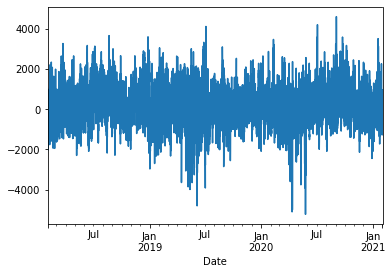

In [12]:
df['target_load'].plot()
means = df['target_load'].expanding().mean()

<AxesSubplot:ylabel='target_load'>

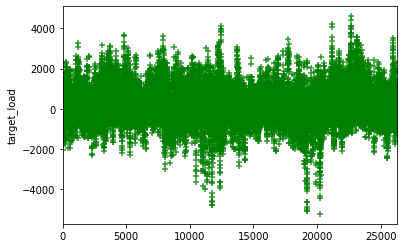

In [26]:
import seaborn as sns
sns.regplot(x = x,y=df ,  color = 'green' , marker="+" , robust = True,fit_reg = True )

In [22]:
x = []
for i in range(len(df)):
    x.append(i)


In [ ]:
# to plot the adjusted model
x_line = np.linspace(np.min(x), np.max(x), 100)
y_line = np.polyval([slope, intercept], x_line)

# confidence interval
ci = t * std_error * (1/n + (x_line - x_mean)**2 / np.sum((x - x_mean)**2))**.5
# predicting interval
pi = t * std_error * (1 + 1/n + (x_line - x_mean)**2 / np.sum((x - x_mean)**2))**.5  

plt.rcParams.update({'font.size': 14})
fig = plt.figure()
ax = fig.add_axes([.1, .1, .8, .8])

ax.plot(x, y, 'o', color = 'royalblue')
ax.plot(x_line, y_line, color = 'royalblue')
ax.fill_between(x_line, y_line + pi, y_line - pi, color = 'lightcyan', label = '95% prediction interval')
ax.fill_between(x_line, y_line + ci, y_line - ci, color = 'skyblue', label = '95% confidence interval')

ax.set_xlabel('x')
ax.set_ylabel('y')

# rounding and position must be changed for each case and preference
a = str(np.round(intercept))
b = str(np.round(slope,2))
r2s = str(np.round(r2,2))
MSEs = str(np.round(MSE))

ax.text(45, 110, 'y = ' + a + ' + ' + b + ' x')
ax.text(45, 100, '$r^2$ = ' + r2s + '     MSE = ' + MSEs)

plt.legend(bbox_to_anchor=(1, .25), fontsize=12)